<a href="https://colab.research.google.com/github/Jonny-T87/Dojo-Work/blob/main/Data_Science_Fundamentals_Belt_Exam_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
filename = '/content/drive/MyDrive/DojoBootCamp/Project Files/literacy_rates.csv'
df = pd.read_csv(filename)

In [4]:
df.describe()

,Year
count,4955.000000
mean,2013.987891
std,2.746204
min,2010.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2018.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         4950 non-null   object
 1   Country        4955 non-null   object
 2   Year           4955 non-null   int64 
 3   Age            4955 non-null   object
 4   Gender         4955 non-null   object
 5   Literacy rate  4955 non-null   object
dtypes: int64(1), object(5)
memory usage: 232.4+ KB


In [6]:
df.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15+,total,0.3174112
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907


In [7]:
df

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15+,total,0.3174112
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907
...,...,...,...,...,...,...
4950,Sub-Saharan Africa,Zimbabwe,2014,25-64,male,0.8972553999999999
4951,Sub-Saharan Africa,Zimbabwe,2014,25-64,total,0.8878737
4952,Sub-Saharan Africa,Zimbabwe,2014,65+,female,0.7342576
4953,Sub-Saharan Africa,Zimbabwe,2014,65+,male,0.9272311000000001


 1.  The first step in this process is to use Python to clean the data to get it ready for analysis. You must:

- Identify and address any duplicate values
- Identify and address any missing values in this dataset. Deal with these appropriately. Include a brief description of the method you used to deal with missing values along with a justification for that method.
- Ensure all columns match the data types listed in the data dictionary.
- Identify and address any inconsistencies in categorical values (example: cat, Cat, cats)
- Identify and address any inappropriate or unusual data points (example: age cannot be 325)

In [8]:
#No duplicates in dataset
df.duplicated().sum()

0

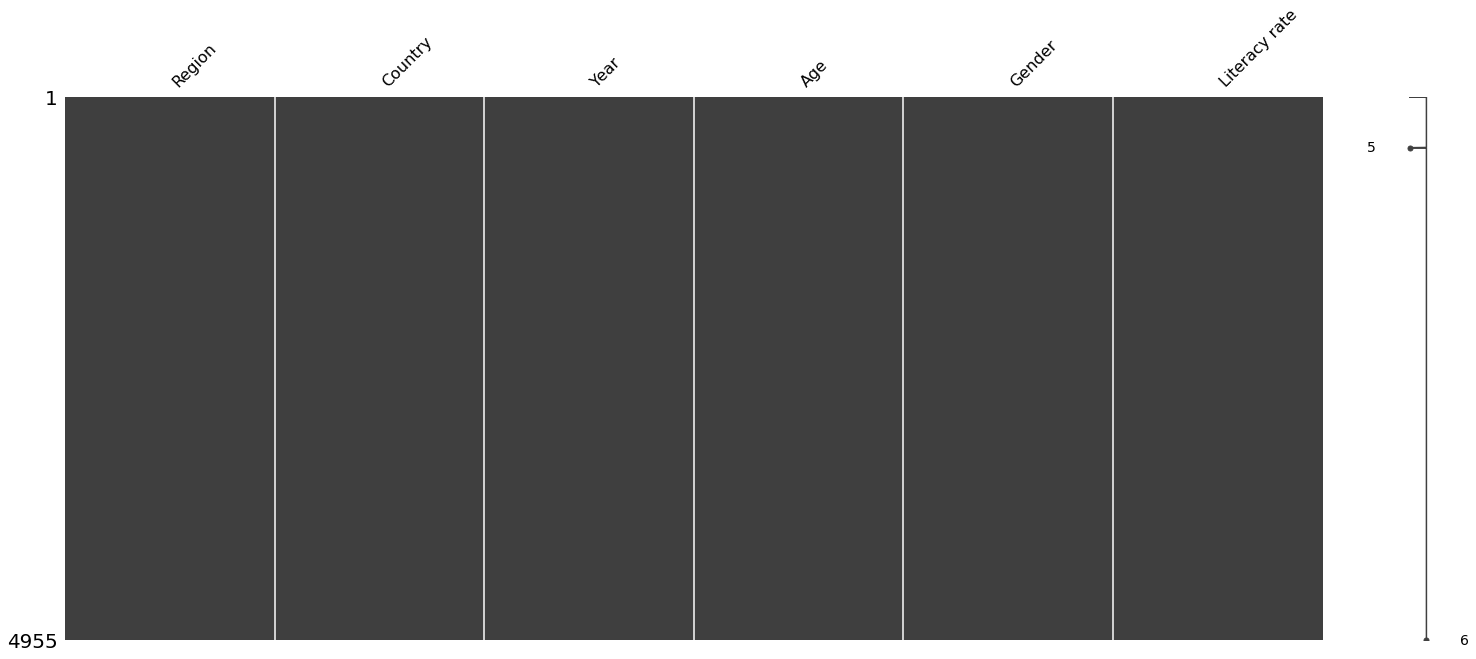

In [9]:
#No missing info using missingno
import missingno
missingno.matrix(df)

In [10]:
#Checking for missing info that is NaN
df.isna().sum()

Region           5
Country          0
Year             0
Age              0
Gender           0
Literacy rate    0
dtype: int64

In [11]:
#Filling NaN to Missing in the Region column
df['Region'].fillna('Missing', inplace=True)

In [12]:
#Instead of filling NaN, i will drop them beacuse it is less than 1% of the data
df.dropna(inplace=True)

In [13]:
#Checking for missing info that is NaN Again
df.isna().sum()

Region           0
Country          0
Year             0
Age              0
Gender           0
Literacy rate    0
dtype: int64

In [14]:
Region_Country = df.groupby(['Region','Country']).sum()
print(Region_Country)

                                                         Year
Region                    Country                            
Central and Southern Asia Afghanistan                   42315
                          Bangladesh                   193392
                          Bhutan                        48348
                          India                         48348
                          Iran (Islamic Republic of)    96660
...                                                       ...
Sub-Saharan Africa        Togo                          48312
                          Uganda                        72480
                          United Republic of Tanzania   72444
                          Zambia                        48336
                          Zimbabwe                      48300

[157 rows x 1 columns]


In [15]:
from dataclasses import replace
# Decided instead of using 'Missing' can categorize based on Region & Country from similar data
def Missing_Countries(df):
      if (df['Country'] == 'Afghanistan').mask(df['Region'] == 'Missing', 0):
        return df['Region'].replace('Missing', 'Central and Southern Asia')
      


In [16]:
df.dtypes

Region           object
Country          object
Year              int64
Age              object
Gender           object
Literacy rate    object
dtype: object

In [17]:
df.nunique()

Region              8
Country           155
Year                9
Age                 4
Gender              3
Literacy rate    4835
dtype: int64

In [18]:
df['Literacy rate']

0                0.1761206
1                 0.454171
2                0.3174112
3                0.3211322
4                0.6187907
               ...        
4950    0.8972553999999999
4951             0.8878737
4952             0.7342576
4953    0.9272311000000001
4954              0.811269
Name: Literacy rate, Length: 4955, dtype: object

In [19]:
df['Literacy rate'].describe()

count     4955
unique    4835
top        1.0
freq        28
Name: Literacy rate, dtype: object

In [20]:
#Changing outlier in dataset from 45.38% to decimals. it is an inappropriate or unusual data point
df['Literacy rate'] = df['Literacy rate'].replace('45.384%','0.453840')

In [21]:
# Changed column 'Literacy rate' dtype from Object to float
df['Literacy rate'] = df['Literacy rate'].astype('float') 

In [22]:
df.dtypes

Region            object
Country           object
Year               int64
Age               object
Gender            object
Literacy rate    float64
dtype: object

In [23]:
#Checking for description for column again
df['Literacy rate'].describe()

count    4955.000000
mean        0.816947
std         0.232560
min         0.004025
25%         0.722507
50%         0.930676
75%         0.985078
max         1.000000
Name: Literacy rate, dtype: float64

In [24]:
#Checked Gender for outliers inconsistencies in categorical values and found none
df.groupby(['Gender']).sum()

,Year,Literacy rate
Gender,,
female,3327107,1290.262570
male,3325096,1410.070800
total,3327107,1347.636965


In [25]:
#Checked Age for outliers inconsistencies in categorical values and found none 
df.groupby(['Age']).sum()

,Year,Literacy rate
Age,,
15+,2537622,1074.985787
15-24,2495334,1138.865815
25-64,2495334,1045.558592
65+,2451020,788.560141


2. The next step is to complete an exploration of the data using Python. This should include:

- Two different types of univariate exploratory visualizations. Each visualization must include a brief interpretation within the code file.
- Two different types of multivariate exploratory visualizations.  Each visualization must include a brief interpretation within the code file.

In [26]:
df.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411
3,Missing,Afghanistan,2011,15-24,female,0.321132
4,Missing,Afghanistan,2011,15-24,male,0.618791


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

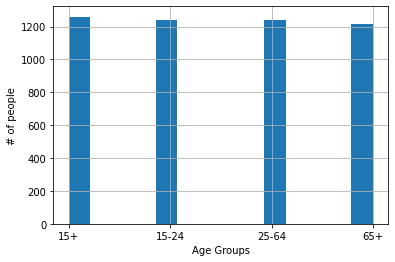

In [30]:
#Making histogram of number of people in Age groups
df['Age'].hist(label='Age Group', bins='auto')
plt.xlabel('Age Groups')
plt.ylabel('# of people');

In [60]:
# Creating filter
region_literacy = df.groupby('Region')['Literacy rate'].mean()
region_literacy

Region
Central and Southern Asia           0.716784
Eastern and South-Eastern Asia      0.882141
Europe and Northern America         0.979013
Latin America and the Caribbean     0.906581
Missing                             0.786671
Northern Africa and Western Asia    0.851144
Oceania                             0.911783
Sub-Saharan Africa                  0.616073
Name: Literacy rate, dtype: float64

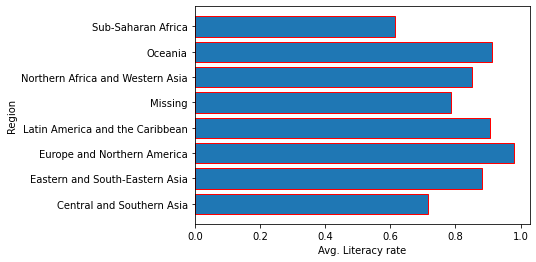

In [70]:
# A horizontal bar graph that shows region_literacy filter to show Avg. Literacy by Region
plt.barh(region_literacy.index, region_literacy.values, edgecolor='red')
plt.xlabel('Avg. Literacy rate')
plt.ylabel('Region');

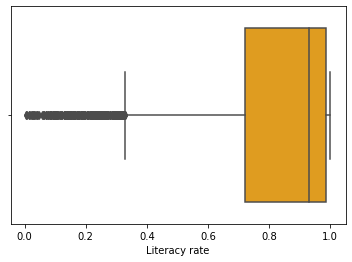

In [36]:
# Creating seaborn boxplot of Literacy rate in orange color. There seems to be many outliers
sns.boxplot(data=df, x='Literacy rate', color='orange');

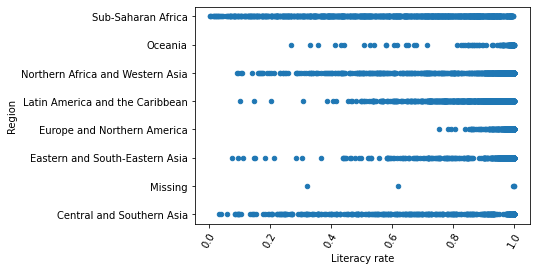

In [48]:
# Made a scatter plot of Literacy rate and Region
df.plot.scatter(x='Literacy rate', y='Region')
plt.xticks(rotation=60);

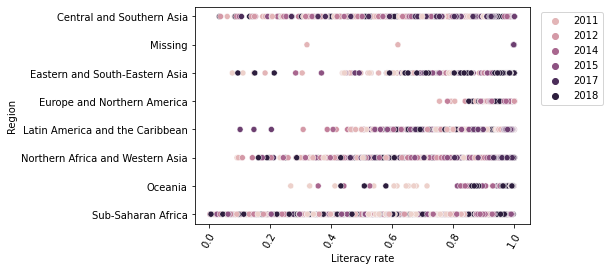

In [54]:
# Made a scaterplot with hue using Literacy rate, Region, and Year
sns.scatterplot(data=df, x='Literacy rate', y='Region', hue='Year')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.02, 1));